In [26]:
import pandas as pd
import matplotlib


data = pd.read_csv('titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [27]:
data.loc[(data.Age < 30),  'AgeGroup30'] = 0
data.loc[(data.Age > 50),  'AgeGroup50'] = 0
data.head(20)

print(data[["AgeGroup30","AgeGroup50","Survived"]].groupby("Survived").count())

          AgeGroup30  AgeGroup50
Survived                        
0                228          42
1                156          22


In [6]:
print(data.groupby("Sex")["Survived"].count())

Sex
female    314
male      577
Name: Survived, dtype: int64


In [5]:
print(data.groupby("Embarked")["Survived"].count())

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


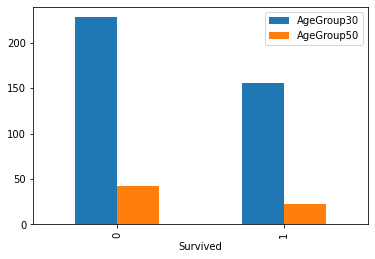

In [30]:
print(data.groupby("Survived")[["AgeGroup30","AgeGroup50"]].count().plot(kind="bar"))

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

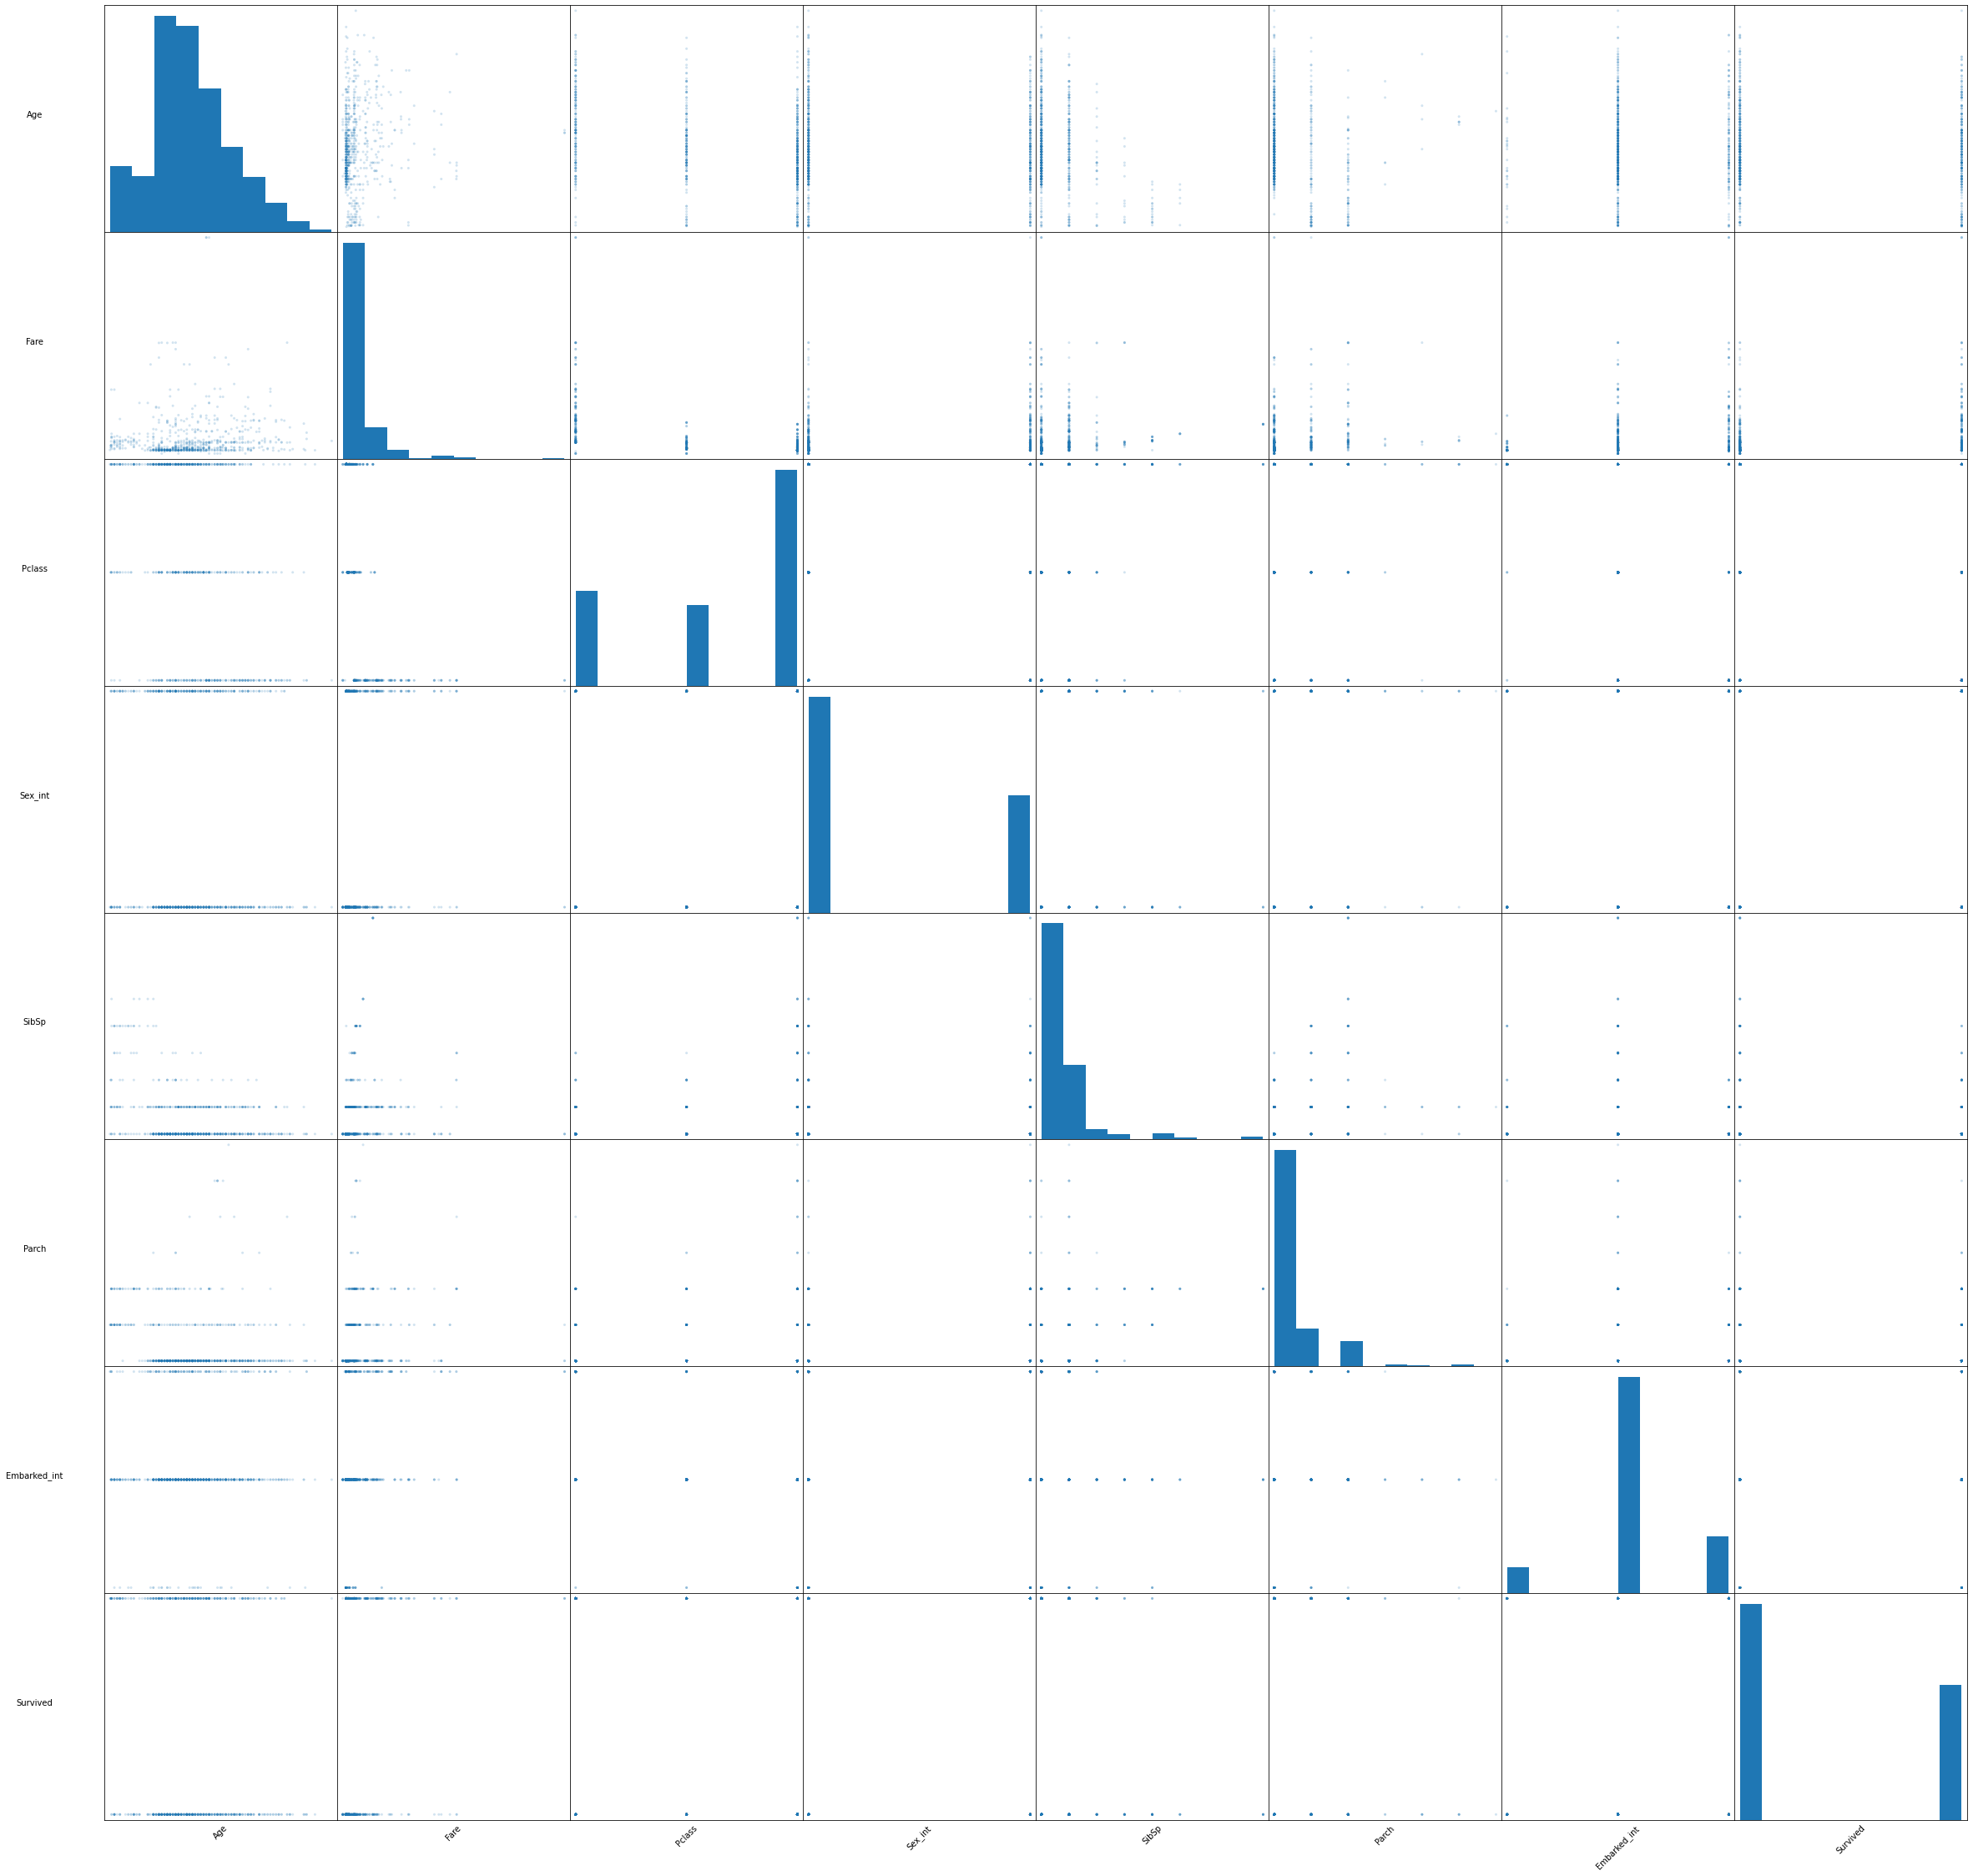

In [20]:
data.loc[data['Sex'] == 'male', 'Sex_int'] = 0
data.loc[data['Sex'] == 'female', 'Sex_int'] = 1
data.loc[data['Embarked'] == 'Q', 'Embarked_int'] = 0
data.loc[data['Embarked'] == 'S', 'Embarked_int'] = 1
data.loc[data['Embarked'] == 'C', 'Embarked_int'] = 2

sm = pd.plotting.scatter_matrix(data[["Age", "Fare", "Pclass", "Sex_int", "SibSp", "Parch", "Embarked_int","Survived"]],figsize=(40, 40),alpha=0.2)

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]



#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]



#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
